In [1]:
import matplotlib.pyplot as plt
import numpy as np                          
import networkx as nx

In [2]:
### You may import any Python's standard library here (Do not import other external libraries) ###
import itertools
from copy import deepcopy
import pickle

## Girvan-Newman algorithm

In this assignment, you will implement Girvan-Newman algorithm, which is the one of the popular algorithm for community detection.

### Procedure

For undirected networks, **repeat** the following iterations until no edges are left:

- Calculate edge centrality for every edge in the target network
- Remove the edge with highest centrality
 
Usually, edge betweenness centrality is used for the centrality metric of the algorithm. In this assignment, we will also use another metric for comparison with edge betweenness.

#### Example graph for checking your implementation

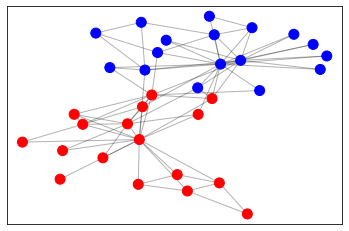

In [3]:
# We will use karate club graph as the example graph
graph_small = nx.karate_club_graph()

# draw the example graph
_node_colors = ["red" if graph_small.nodes[i]["club"] == "Mr. Hi" else "blue" for i in range(graph_small.number_of_nodes())]
_pos = nx.spring_layout(graph_small)
nx.draw_networkx_nodes(graph_small, _pos, node_color=_node_colors, node_size=100)
nx.draw_networkx_edges(graph_small, _pos, alpha=0.3)
plt.show()

# inject weights for the example graph
for (u, v), w in pickle.load(open('data/karate_weights.pkl', 'rb')).items():
    graph_small[u][v]['weight'] = w

## Task 1: Find the edge with highest centrality

In this task, you will implement two helper functions to choose edges for every iteration of Girvan-Newman algorithm.

You should write two functions: `choose_edges_by_betweenness_centrality(graph, eps)` and `choose_edges_by_weight(graph, eps)`


### Task 1.1: Choose edges to remove by betweenness centrality

Your first task is to implement a function `choose_edges_by_betweenness_centrality(graph, eps)`

#### Parameters:
- **graph**: a NetworkX graph object
- **eps**: float

In the function, you should return a list of edges with highest centrality. Due to the precision of the float data type, report all edges which score is higher than (highest_centrality) - (eps).

**Tip:** You don't need to implement own algorithm for computing betweenness centrality. Use builtin function in NetworkX for computing the centrality.

In [4]:
def choose_edges_by_betweenness_centrality(graph, eps=1e-9):
    ### WRITE YOUR CODE ###
    target_edges = []
    betweenness_centrality = nx.edge_betweenness_centrality(graph)
    highest_centrality = max(betweenness_centrality.values())
    for key, value in betweenness_centrality.items():
        if value > highest_centrality - eps:
            target_edges.append(key)
    #######################
    
    return target_edges

### Task 1.2: Choose edges to remove by weight

Your second task is to implement a function `choose_edges_by_weight(graph, eps)`

#### Parameters:
- **graph**: a NetworkX graph object
- **eps**: float

In the function, you should return a list of edges with largest weight. Due to the precision of the float data type, report all edges which score is higher than (largest_weight) - (eps)

In [5]:
def choose_edges_by_weight(graph, eps=1e-9):
    ### WRITE YOUR CODE ###
    target_edges = []
    weights = {}

    for edge in graph.edges:
        weights[edge] = graph[edge[0]][edge[1]]['weight']
    
    largest_weight = max(weights.values())
    
    for key, value in weights.items():
        if value > largest_weight - eps:
            target_edges.append(key)
    #######################
    
    return target_edges

In [6]:
# IMPORTANT: DO NOT CHANGE ANYTHING IN THIS CELL!

def test_task1_1(_graph):
    try:
        graph = deepcopy(_graph)
        answer = []
        while graph.number_of_edges() > 0:
            target_edges = choose_edges_by_betweenness_centrality(graph)
            graph.remove_edges_from(target_edges)
            answer.append(set(target_edges))
        expected = pickle.load(open('data/answer1_1.pkl', 'rb'))
        if len(expected) != len(answer):
            return "\033[91mWrong Answer\033[90m"
        for i, (edges_in_answer, edges_in_expected) in enumerate(zip(answer, expected)):
            # if i == 5: edges_in_expected = set([])
            if len(edges_in_answer ^ edges_in_expected) > 0:
                return f"\033[91mWrong Answer\033[90m"
        return "\033[1m\033[92mCorrect!\033[90m\033[0m"
    except:
        return "\033[94mRuntime Error or Time Limit Exceeded\033[90m"

def test_task1_2(_graph):
    try:
        graph = deepcopy(_graph)
        answer = []
        while graph.number_of_edges() > 0:
            target_edges = choose_edges_by_weight(graph)
            graph.remove_edges_from(target_edges)
            answer.append(set(target_edges))
        expected = pickle.load(open('data/answer1_2.pkl', 'rb'))
        if len(expected) != len(answer):
            return "\033[91mWrong Answer\033[90m"
        for i, (edges_in_answer, edges_in_expected) in enumerate(zip(answer, expected)):
            # if i == 3: edges_in_expected = set([])
            if len(edges_in_answer ^ edges_in_expected) > 0:
                return f"\033[91mWrong Answer\033[90m"
        return "\033[1m\033[92mCorrect!\033[90m\033[0m"
    except:
        return "\033[94mRuntime Error or Time Limit Exceeded\033[90m"
    
print('Task 1.1:', test_task1_1(graph_small))
print('Task 1.2:', test_task1_2(graph_small))

Task 1.1: Correct!
Task 1.2: Correct!


## Task 2: Implement Girvan-Newman algorithm

In this task, you will implement Girvan-Newman algorithm with the functions already implemented in task 1.

You should write two functions: `girvan_newman(graph, method, visualize, break_condition)` and `plot_results(algorithm_outputs)`



### Task 2.1: Implement the function `girvan_newman()`

Implement Girvan-Newman algorithm in the function `girvan_newman(graph, method, visualize, break_condition)`.

You are **not** allowed to use builtin implementation for the algorithm (`networkx.algorithms.community.centrality.girvan_newman`). But you can use other functions provided in NetworkX. For example, NetworkX provide the function `nx.algorithms.community.modularity(graph, communities, weight)`, which computes modularity for the given communities information.

#### Parameters:
- **graph**: a NetworkX graph object
- **method**: string ("betweenness" or "weight")
- **visualize**: boolean
- **break_condition**: int

#### Explanation for the parameters
- If `method="betweenness"`, your implementation should choose edges to remove by betweenness centrality. Otherwise, choose the edges by their weights.
- If `visualize=True`, you can see the process of the algorithm for the example graph. You don't need additional implementation to visualize the results.
- If the number of connected components of the graph is larger than the `break_condition`, you should stop the execution of the algorithm.

You should compute the number of connected components for each step of the algorithm. Also, update the modularity only when the number of connected components has changed.

Note that there is **no** specific format for the return value of the function. However, you should consider that the return value will be used as the **input** of the function `plot_results` in Task 2.2.

In [7]:
def girvan_newman(_graph, method="betweenness", visualize=True, break_condition=10):
    graph = deepcopy(_graph)
    if _graph is not graph_small: visualize = False
    step_cnt = 0
    
    ### WRITE YOUR CODE ###
    outputs ={}
    #######################
    
    while graph.number_of_edges() > 0:
        step_cnt += 1
        ### WRITE YOUR CODE ###############################################
        # Calculate edge centrality for every edge in the target network
        # Remove the edge with highest centrality
        if method == 'betweenness':
            target_edges = choose_edges_by_betweenness_centrality(graph)
        elif method == 'weight':
            target_edges = choose_edges_by_weight(graph)
        
        graph.remove_edges_from(target_edges)
        
        communities = list(nx.connected_components(graph))
        number_of_connected_components = len(communities)
        modularity = nx.algorithms.community.modularity(_graph, communities, weight=None)
        ###################################################################
        
        if number_of_connected_components is not None and type(number_of_connected_components) == int and number_of_connected_components > break_condition:
            break
        
        ### WRITE YOUR CODE ###
        print(f"Step #{step_cnt} | Number of connected components: {number_of_connected_components} / modularity: {modularity}")
        
        outputs[number_of_connected_components] = modularity
        #######################
        if visualize:
            nx.draw_networkx_nodes(graph, _pos, node_color=_node_colors, node_size=100)
            nx.draw_networkx_edges(graph, _pos, alpha=0.3)
            plt.show()
            print("\n")
    
    return outputs

### Task 2.2: Implement the function `plot_results`

Plot the execution result of `girvan_newman(graph, method)`. You should provide the plot showing the relation between **number of connected components** and **modularity**.

Also, report the number of connected components when the modularity is maximized.

#### Parameters:
- **algorithm_outputs**: a return value of the function `girvan_newman()`

In [9]:
def plot_results(algorithm_outputs):
    ### WRITE YOUR CODE #########################################
    # Report the number of CC when the modularity is maximized
    # Plot the execution result of the algorithm
    
    max_num_cc = max(algorithm_outputs.keys(), key=lambda k : algorithm_outputs[k])
    print("Number of connected components when the modularity is maximized:", max_num_cc)
    fig = plt.figure()
    plt.plot(algorithm_outputs.keys(), algorithm_outputs.values())
    plt.xlabel('# of connected components')
    plt.ylabel('Modularity')
    plt.show()
    #############################################################

### Test your implementation

Step #1 | Number of connected components: 1 / modularity: 0.0
Step #2 | Number of connected components: 1 / modularity: 0.0
Step #3 | Number of connected components: 1 / modularity: 0.0
Step #4 | Number of connected components: 1 / modularity: 0.0
Step #5 | Number of connected components: 1 / modularity: 0.0
Step #6 | Number of connected components: 1 / modularity: 0.0
Step #7 | Number of connected components: 1 / modularity: 0.0
Step #8 | Number of connected components: 1 / modularity: 0.0
Step #9 | Number of connected components: 1 / modularity: 0.0
Step #10 | Number of connected components: 2 / modularity: 0.3599605522682445
Step #11 | Number of connected components: 2 / modularity: 0.3599605522682445
Step #12 | Number of connected components: 2 / modularity: 0.3599605522682445
Step #13 | Number of connected components: 3 / modularity: 0.34878369493754113
Step #14 | Number of connected components: 3 / modularity: 0.34878369493754113
Step #15 | Number of connected components: 4 / mod

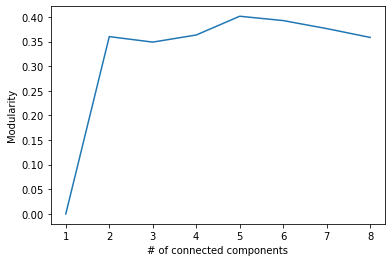

In [10]:
algorithm_outputs = girvan_newman(graph_small, method="betweenness", visualize=False)
plot_results(algorithm_outputs)

Step #1 | Number of connected components: 1 / modularity: 0.0
Step #2 | Number of connected components: 1 / modularity: 0.0
Step #3 | Number of connected components: 1 / modularity: 0.0
Step #4 | Number of connected components: 1 / modularity: 0.0
Step #5 | Number of connected components: 1 / modularity: 0.0
Step #6 | Number of connected components: 1 / modularity: 0.0
Step #7 | Number of connected components: 1 / modularity: 0.0
Step #8 | Number of connected components: 2 / modularity: -8.21827744905179e-05
Step #9 | Number of connected components: 2 / modularity: -8.21827744905179e-05
Step #10 | Number of connected components: 2 / modularity: -8.21827744905179e-05
Step #11 | Number of connected components: 3 / modularity: 0.13141025641025636
Step #12 | Number of connected components: 3 / modularity: 0.13141025641025636
Step #13 | Number of connected components: 3 / modularity: 0.13141025641025636
Step #14 | Number of connected components: 3 / modularity: 0.13141025641025636
Step #15 

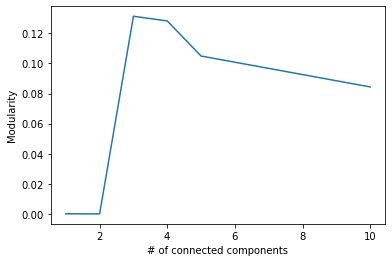

In [11]:
algorithm_outputs = girvan_newman(graph_small, method="weight", visualize=False)
plot_results(algorithm_outputs)

### TA's answer for task 2 (on the example graph)

#### method = "betweenness"

Number of connected components when the modularity is maximized: 5


Text(0.5, 0, '# of connected components')

Text(0, 0.5, 'Modularity')

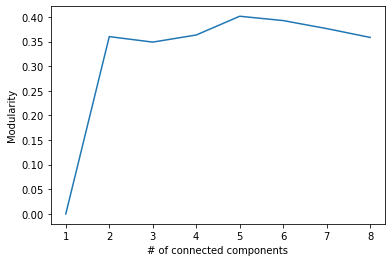

In [13]:
fig = plt.figure()
print("Number of connected components when the modularity is maximized: 5")
plt.plot((1, 2, 3, 4, 5, 6, 7, 8), (0.0, 0.3599605522682445, 0.34878369493754113, 0.3632478632478633, 0.40129848783694944, 0.3925049309664695, 0.37623274161735704, 0.3583168967784353))
plt.xlabel('# of connected components')
plt.ylabel('Modularity')
plt.show()

#### method = "weight"

Number of connected components when the modularity is maximized: 3


Text(0.5, 0, '# of connected components')

Text(0, 0.5, 'Modularity')

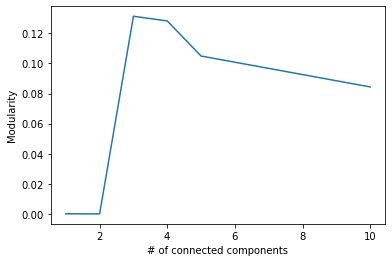

In [14]:
fig = plt.figure()
print("Number of connected components when the modularity is maximized: 3")
plt.plot((1, 2, 3, 4, 5, 10), (0.0, -8.21827744905179e-05, 0.13141025641025636, 0.1282873109796187, 0.10494740302432615, 0.08440170940170948))
plt.xlabel('# of connected components')
plt.ylabel('Modularity')
plt.show()

### Task 2.3: Run Girvan-Newman algorithm on larger graph

Run your implementation on larger graph. Your implementation should be run within $2$ minutes on the large graph.

Also, provide and analyze the results in `report.pdf`. 

In [15]:
graph_large = pickle.load(open("data/graph_large.pkl", "rb"))
print('# of nodes:', graph_large.number_of_nodes(), '/ # of edges:', graph_large.number_of_edges())

# of nodes: 176 / # of edges: 2193


Step #1 | Number of connected components: 1 / modularity: 0.0
Step #2 | Number of connected components: 1 / modularity: 0.0
Step #3 | Number of connected components: 1 / modularity: 0.0
Step #4 | Number of connected components: 1 / modularity: 0.0
Step #5 | Number of connected components: 1 / modularity: 0.0
Step #6 | Number of connected components: 1 / modularity: 0.0
Step #7 | Number of connected components: 1 / modularity: 0.0
Step #8 | Number of connected components: 1 / modularity: 0.0
Step #9 | Number of connected components: 1 / modularity: 0.0
Step #10 | Number of connected components: 1 / modularity: 0.0
Step #11 | Number of connected components: 1 / modularity: 0.0
Step #12 | Number of connected components: 1 / modularity: 0.0
Step #13 | Number of connected components: 1 / modularity: 0.0
Step #14 | Number of connected components: 1 / modularity: 0.0
Step #15 | Number of connected components: 1 / modularity: 0.0
Step #16 | Number of connected components: 1 / modularity: 0.0
S

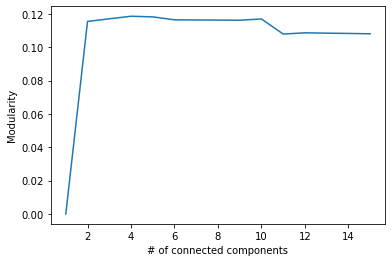

In [16]:
algorithm_outputs = girvan_newman(graph_large, method="betweenness", visualize=False, break_condition=15)
plot_results(algorithm_outputs)

Step #1 | Number of connected components: 1 / modularity: 0.0
Step #2 | Number of connected components: 1 / modularity: 0.0
Step #3 | Number of connected components: 1 / modularity: 0.0
Step #4 | Number of connected components: 1 / modularity: 0.0
Step #5 | Number of connected components: 1 / modularity: 0.0
Step #6 | Number of connected components: 1 / modularity: 0.0
Step #7 | Number of connected components: 1 / modularity: 0.0
Step #8 | Number of connected components: 1 / modularity: 0.0
Step #9 | Number of connected components: 1 / modularity: 0.0
Step #10 | Number of connected components: 1 / modularity: 0.0
Step #11 | Number of connected components: 1 / modularity: 0.0
Step #12 | Number of connected components: 1 / modularity: 0.0
Step #13 | Number of connected components: 1 / modularity: 0.0
Step #14 | Number of connected components: 1 / modularity: 0.0
Step #15 | Number of connected components: 1 / modularity: 0.0
Step #16 | Number of connected components: 1 / modularity: 0.0
S

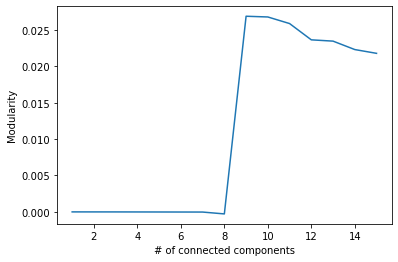

In [17]:
algorithm_outputs = girvan_newman(graph_large, method="weight", visualize=False, break_condition=15)
plot_results(algorithm_outputs)